In [1]:
import pandas as pd #data reading
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing # label encoding
from sklearn.tree import DecisionTreeClassifier, plot_tree # Import Decision Tree Classifier and plotting function
from sklearn.metrics import accuracy_score, confusion_matrix
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression


# Load the dataset & visualization

In [2]:
input_directory = '/content/drive/Shared drives/Data Mining Project/'

# Import the training data
X_train = pd.read_csv(input_directory + 'X_train.csv')
y_train = pd.read_csv(input_directory + 'y_train.csv')

# Import the validation data
X_val = pd.read_csv(input_directory + 'X_val.csv')
y_val = pd.read_csv(input_directory + 'y_val.csv')

# Import the testing data
X_test = pd.read_csv(input_directory + 'X_test.csv')
y_test = pd.read_csv(input_directory + 'y_test.csv')


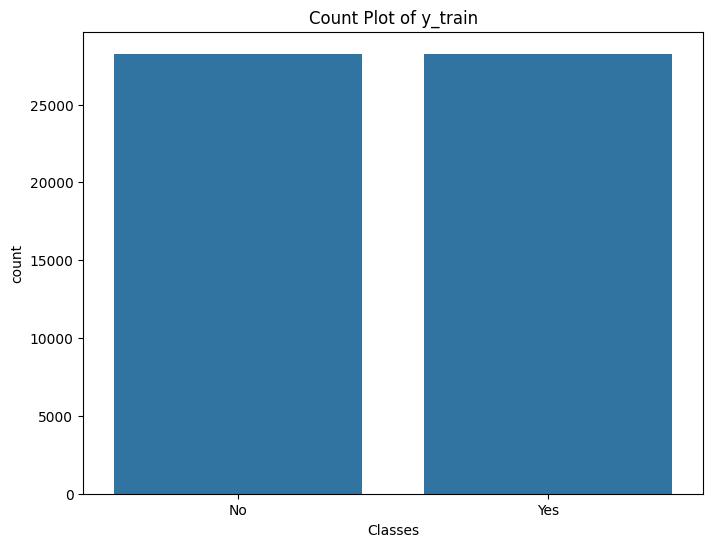

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.countplot(x='0', data = y_train)
plt.title('Count Plot of y_train')
plt.xlabel('Classes')
plt.show()

# Decision Tree

Grid search is used to find the best parameters
Note: the code takes some times to run

In [5]:
from sklearn.model_selection import GridSearchCV
tree_para = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,15,20],'min_samples_split': [2, 3, 4],
             'class_weight': [{'No': 1, 'Yes': 1},{'No': 1, 'Yes': 1.1},{'No': 1, 'Yes': 1.2},{'No': 1, 'Yes': 1.3}]}
clf = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=5)
clf.fit(X_train,y_train)
print("tuned hpyerparameters :(best parameters) :",clf.best_params_)
print(clf.best_estimator_)

tuned hpyerparameters :(best parameters) : {'class_weight': {'No': 1, 'Yes': 1}, 'criterion': 'entropy', 'max_depth': 8, 'min_samples_split': 4}
DecisionTreeClassifier(class_weight={'No': 1, 'Yes': 1}, criterion='entropy',
                       max_depth=8, min_samples_split=4)


Train the Decision Tree

In [13]:
clf = DecisionTreeClassifier(max_depth = 5,
                             criterion = 'gini',
                             min_samples_split = 3
)
clf_5 = clf.fit(X_train,y_train)

In [19]:
clf = DecisionTreeClassifier(max_depth = 8,
                             criterion = 'gini',
                             min_samples_split = 3
)
clf = clf.fit(X_train,y_train)

Validation and tuning

In [6]:
y_val_pred = clf.predict(X_val)
print(y_val_pred)

['No' 'No' 'Yes' ... 'No' 'Yes' 'No']


In [7]:
RF_acc = accuracy_score(y_val,y_val_pred)

print('Accuracy of Decision Tree:', RF_acc)

Accuracy of Decision Tree: 0.7222954601631375


In [8]:
from sklearn.metrics import classification_report

print(classification_report(y_val, y_val_pred))


              precision    recall  f1-score   support

          No       0.95      0.71      0.81     20741
         Yes       0.31      0.77      0.45      3533

    accuracy                           0.72     24274
   macro avg       0.63      0.74      0.63     24274
weighted avg       0.86      0.72      0.76     24274



Visualize the tree

In [10]:
#Visualize the trained Decision Tree
fn=X_train.columns
cn=['No','Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (30,30), dpi=600)
plot_tree(clf_5,
          feature_names = fn,
          class_names=cn,
          filled = True, fontsize=2);

### Decision Tree Evaluation

In [20]:
y_test_pred = clf.predict(X_test)
print(y_test_pred)

['Yes' 'No' 'Yes' ... 'No' 'No' 'No']


<Axes: >

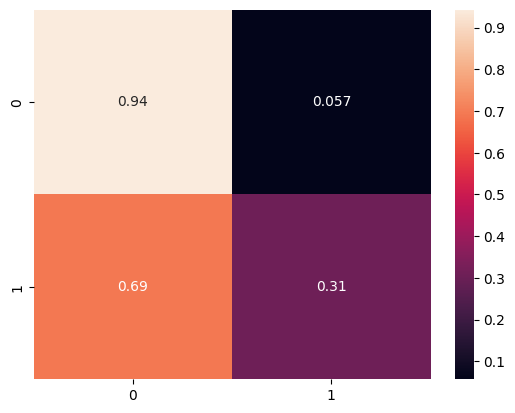

In [25]:
clf_conf_mat = confusion_matrix(y_test_pred,y_test,normalize='true')
sns.heatmap(clf_conf_mat, annot=True)

In [22]:
DT_acc = accuracy_score(y_test,y_test_pred)

print('Accuracy of Decision Tree:', DT_acc)

Accuracy of Decision Tree: 0.7186701820878306


In [23]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.94      0.71      0.81     20741
         Yes       0.31      0.75      0.44      3533

    accuracy                           0.72     24274
   macro avg       0.63      0.73      0.62     24274
weighted avg       0.85      0.72      0.76     24274



In [24]:
cv_scores = cross_val_score(clf, X_train, y_train, cv=5)
print("Cross-Validation Scores: " , cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy: ", mean_accuracy)

Cross-Validation Scores:  [0.73315054 0.72607465 0.72978949 0.72846276 0.73589245]
Mean Accuracy:  0.7306739784185388


# Random Forest

<ipython-input-26-e07b0e2e0683>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = clf_RF.fit(X_train, y_train)


Accuracy of Random Forest: 0.7255087748207959


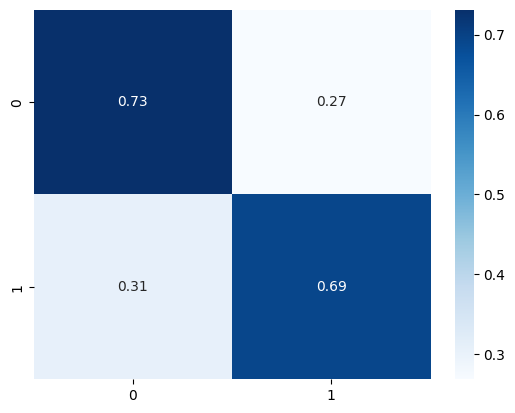

In [26]:
from sklearn.ensemble import RandomForestClassifier
clf_RF = RandomForestClassifier(n_estimators=10)
clf_RF = clf_RF.fit(X_train, y_train)

y_val_RF_pred = clf_RF.predict(X_val)
RF_acc = accuracy_score(y_val,y_val_RF_pred)
RF_confmat = confusion_matrix(y_val, y_val_RF_pred, normalize = 'true')

print('Accuracy of Random Forest:', RF_acc)
sns.heatmap(RF_confmat,annot=True,cmap='Blues')
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [10, 50, 100],  # Number of trees in the forest
    'max_depth': [None, 10, 20],      # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]     # Minimum number of samples required at each leaf node
}

# Create the grid search object
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, scoring='accuracy')
# Convert y_train to a 1D array
y_train_flat = np.ravel(y_train)

# Perform the grid search with the flattened target variable
grid_search.fit(X_train, y_train_flat)

# Perform the grid search
#grid_search.fit(X_train, y_train)

# Get the best parameters and the best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters:", best_params)
print("Best Accuracy:", best_score)

Best Parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Best Accuracy: 0.7458871395719087


<ipython-input-27-65f1a0143260>:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  clf_RF = clf_RF.fit(X_train, y_train)


Accuracy of Random Forest: 0.7206888028343084


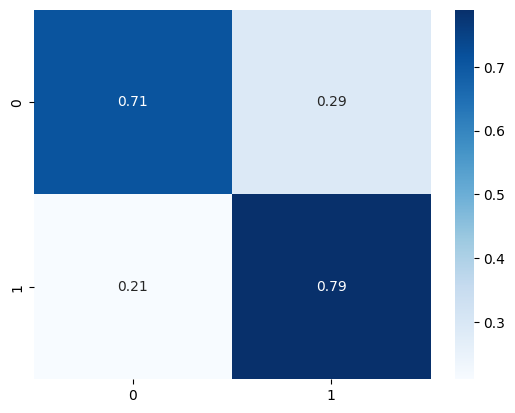

In [27]:
clf_RF = RandomForestClassifier(n_estimators=100, min_samples_split = 2,
                                min_samples_leaf = 4)
clf_RF = clf_RF.fit(X_train, y_train)

y_val_RF_pred = clf_RF.predict(X_val)
RF_acc = accuracy_score(y_val,y_val_RF_pred)
RF_confmat = confusion_matrix(y_val, y_val_RF_pred, normalize = 'true')

print('Accuracy of Random Forest:', RF_acc)
sns.heatmap(RF_confmat,annot=True,cmap='Blues')
plt.show()

In [28]:
print(classification_report(y_val, y_val_RF_pred))


              precision    recall  f1-score   support

          No       0.95      0.71      0.81     20741
         Yes       0.32      0.79      0.45      3533

    accuracy                           0.72     24274
   macro avg       0.63      0.75      0.63     24274
weighted avg       0.86      0.72      0.76     24274



### Random forest evaluation

In [29]:
y_test_pred = clf_RF.predict(X_test)

RF_acc = accuracy_score(y_test,y_test_pred)

print('Accuracy:', RF_acc)

Accuracy: 0.7179698442778282


<Axes: >

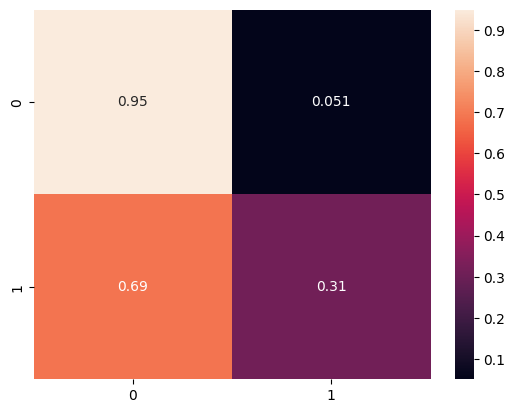

In [30]:
clf_conf_mat = confusion_matrix(y_test_pred,y_test,normalize='true')
sns.heatmap(clf_conf_mat, annot=True)

In [24]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.95      0.71      0.81     20741
         Yes       0.31      0.78      0.44      3533

    accuracy                           0.72     24274
   macro avg       0.63      0.74      0.63     24274
weighted avg       0.86      0.72      0.76     24274



In [25]:
cv_scores = cross_val_score(clf_RF, X_train, y_train, cv=5)
print("Cross-Validation Scores: " , cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy: ", mean_accuracy)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed whe

Cross-Validation Scores:  [0.74411817 0.74774456 0.74146471 0.74579869 0.74907129]
Mean Accuracy:  0.7456394834601097


# Logistic Regression

Initialize model

In [4]:
# Ensure y_train and y_test are 1D arrays
y_train = y_train.values.ravel()
y_val = y_val.values.ravel()
y_test = y_test.values.ravel()

In [32]:
log_reg = LogisticRegression(solver="liblinear", max_iter=100)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_val)

Accuracy of Logistic regression: 0.7338716321990607


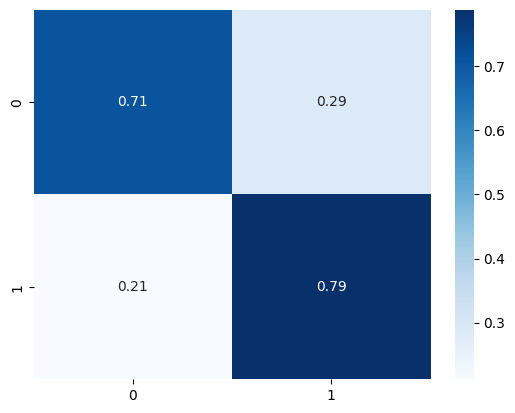

In [32]:
LR_acc = accuracy_score(y_val,y_pred)
LR_confmat = confusion_matrix(y_val, y_pred, normalize = 'true')

print('Accuracy of Logistic regression:', LR_acc)
sns.heatmap(RF_confmat,annot=True,cmap='Blues')
plt.show()

use grid search to find out the best parameter

In [34]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

param_grid = {
    'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga'],
    'max_iter': [100, 200, 300,400,500,600],
}

log_reg = LogisticRegression()
grid_search = GridSearchCV(estimator=log_reg, param_grid=param_grid, cv=5)

grid_search.fit(X_train, y_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Best parameters: {'max_iter': 100, 'solver': 'liblinear'}


### Logistic Regression Evaluation

In [33]:
y_test_pred = log_reg.predict(X_test)

RF_acc = accuracy_score(y_test,y_test_pred)

print('Accuracy:', RF_acc)

Accuracy: 0.7302875504655186


<Axes: >

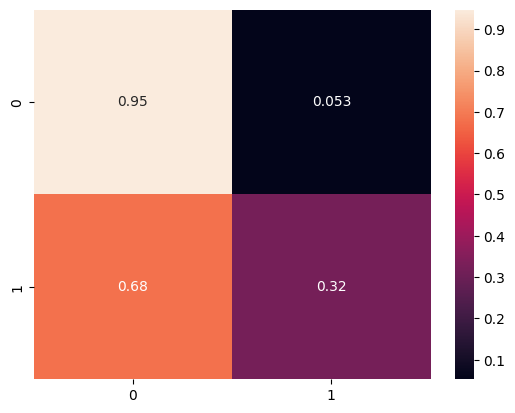

In [34]:
clf_conf_mat = confusion_matrix(y_test_pred,y_test,normalize='true')
sns.heatmap(clf_conf_mat, annot=True)

In [35]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.95      0.72      0.82     20741
         Yes       0.32      0.76      0.45      3533

    accuracy                           0.73     24274
   macro avg       0.63      0.74      0.64     24274
weighted avg       0.86      0.73      0.77     24274



In [36]:
cv_scores = cross_val_score(clf_RF, X_train, y_train, cv=5)
print("Cross-Validation Scores: " , cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy: ", mean_accuracy)

Cross-Validation Scores:  [0.74128781 0.74792146 0.74394127 0.74367592 0.74650628]
Mean Accuracy:  0.7446665487351849


# Support Vector Machine

Grid search took more than 1 hour and the runtime kept getting disconnected

In [ ]:
'''from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the parameter grid including kernel
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel types to search over
}

# Initialize SVM classifier
svm_classifier = SVC()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=svm_classifier, param_grid=param_grid, cv=5)

# Fit GridSearchCV to the training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test set
test_score = best_model.score(X_test, y_test)

print('Best parameters:', best_params)
print('Best cross-validation score:', best_score)
print('Test score with best model:', test_score)'''


In [5]:
param_grid = {
    'C': [0.1, 1, 10, 100],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient
    'kernel': ['linear', 'rbf', 'poly']  # Kernel types to search over
}

In [7]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', C=0.1, gamma = 'scale')
SVM.fit(X_train, y_train)

NameError: name 'svm' is not defined

In [8]:
score = SVM.score(X_val, y_val)
print('evaluation score with linear kernel:', score)

evaluation score with linear kernel: 0.7229546016313751


In [12]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', C=1, gamma = 'auto')
SVM.fit(X_train, y_train)
score = SVM.score(X_val, y_val)
print('evaluation score with linear kernel:', score)

evaluation score with linear kernel: 0.7229134052896102


In [13]:
from sklearn.svm import SVC

SVM = SVC(kernel='linear', C=10, gamma = 'auto')
SVM.fit(X_train, y_train)
score = SVM.score(X_val, y_val)
print('evaluation score with linear kernel:', score)

evaluation score with linear kernel: 0.7229134052896102


In [9]:
from sklearn.svm import SVC

SVM = SVC(kernel='rbf', C=0.1, gamma = 'scale')
SVM.fit(X_train, y_train)
score = SVM.score(X_val, y_val)
print('evaluation score with linear kernel:', score)

evaluation score with linear kernel: 0.7125319271648678


In [10]:
from sklearn.svm import SVC

SVM = SVC(kernel='poly', C=0.1, gamma = 'scale')
SVM.fit(X_train, y_train)
score = SVM.score(X_val, y_val)
print('evaluation score with linear kernel:', score)

evaluation score with linear kernel: 0.7129850869242811


### SVM evaluation

In [14]:
SVM = SVC(kernel='linear', C=1, gamma = 'auto')
SVM.fit(X_train, y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [15]:
y_test_pred = SVM.predict(X_test)


acc = accuracy_score(y_test,y_test_pred)

print('Accuracy:', acc)

Accuracy: 0.7205652138090137


<Axes: >

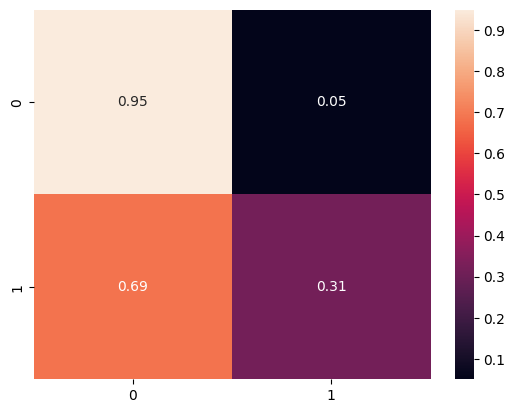

In [16]:
clf_conf_mat = confusion_matrix(y_test_pred,y_test,normalize='true')
sns.heatmap(clf_conf_mat, annot=True)

In [17]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

              precision    recall  f1-score   support

          No       0.95      0.71      0.81     20741
         Yes       0.31      0.78      0.45      3533

    accuracy                           0.72     24274
   macro avg       0.63      0.75      0.63     24274
weighted avg       0.86      0.72      0.76     24274



In [19]:
cv_scores = cross_val_score(SVM, X_train, y_train, cv=5)
print("Cross-Validation Scores: " , cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy: ", mean_accuracy)

Cross-Validation Scores:  [0.7449142  0.7454449  0.75057492 0.74650628 0.7450911 ]
Mean Accuracy:  0.7465062798514064


# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k_range = range(1, 20)
validation_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train.ravel())
    y_val_pred = knn.predict(X_val)
    validation_scores.append(accuracy_score(y_val, y_val_pred))

best_k = validation_scores.index(max(validation_scores)) + 1
best_accuracy = max(validation_scores)

print(f"The best k is: {best_k} with validation accuracy: {best_accuracy}")

In [ ]:
# Initialize the KNN classifier with the best k value
knn = KNeighborsClassifier(n_neighbors=best_k)

# Fit the classifier to the training data
knn.fit(X_train, y_train)

### KNN evaluation

In [ ]:
y_test_pred = knn.predict(X_test)

RF_acc = accuracy_score(y_test,y_test_pred)

print('Accuracy:', RF_acc)

In [ ]:
clf_conf_mat = confusion_matrix(y_test_pred,y_test,normalize='true')
sns.heatmap(clf_conf_mat, annot=True)

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_test,y_test_pred))

In [ ]:
cv_scores = cross_val_score(knn, X_train, y_train, cv=5)
print("Cross-Validation Scores: " , cv_scores)
mean_accuracy = cv_scores.mean()
print("Mean Accuracy: ", mean_accuracy)